In [112]:
# !pip install numpy pandas matplotlib scikit-learn seaborn

In [113]:
# !python.exe -m pip install --upgrade pip

In [1]:
!pip freeze > requirements.txt

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns

### Load the dataset

In [4]:
dataset = pd.read_csv(r"C:\Users\risha\Program_folder\Projects\Employee_Salary\Rishabh_Singh_Assignment\HR_comma_sep.csv")
dataset.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


The dataset contains the following columns:

<ol>
<li><strong>satisfaction_level:</strong> Employee's satisfaction level.</li>
<li><strong>last_evaluation:</strong> Last evaluation score.</li>
<li><strong>number_project:</strong> Number of projects assigned to the employee.</li>
<li><strong>average_montly_hours:</strong> Average monthly working hours.</li>
<li><strong>time_spend_company:</strong> Number of years spent at the company.</li>
<li><strong>Work_accident:</strong> Whether the employee had a work accident (binary: 0 or 1). This is our Target variable</li>
<li><strong>left:</strong> Whether the employee has left the company (binary: 0 or 1).</li>
<li><strong>promotion_last_5years:</strong> Whether the employee was promoted in the last 5 years (binary: 0 or 1).</li>
<li><strong>Department:</strong> Department where the employee works.</li>
<li><strong>salary:</strong> Salary level (categorical: 'low', 'medium', 'high').</li>
</ol>

In [160]:
dataset.info()
dataset.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


Out of all the variables, <strong>Work accident, left, Department and Salary</strong> are the categorical variables else all others are Numerical variables

### Exploratory data analysis
Check if the data contains any miussing values

In [161]:
dataset.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

The dataset does not contain any missing values. 

In [164]:
dup = dataset.duplicated()
dataset[dup]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### Univariate Analysis

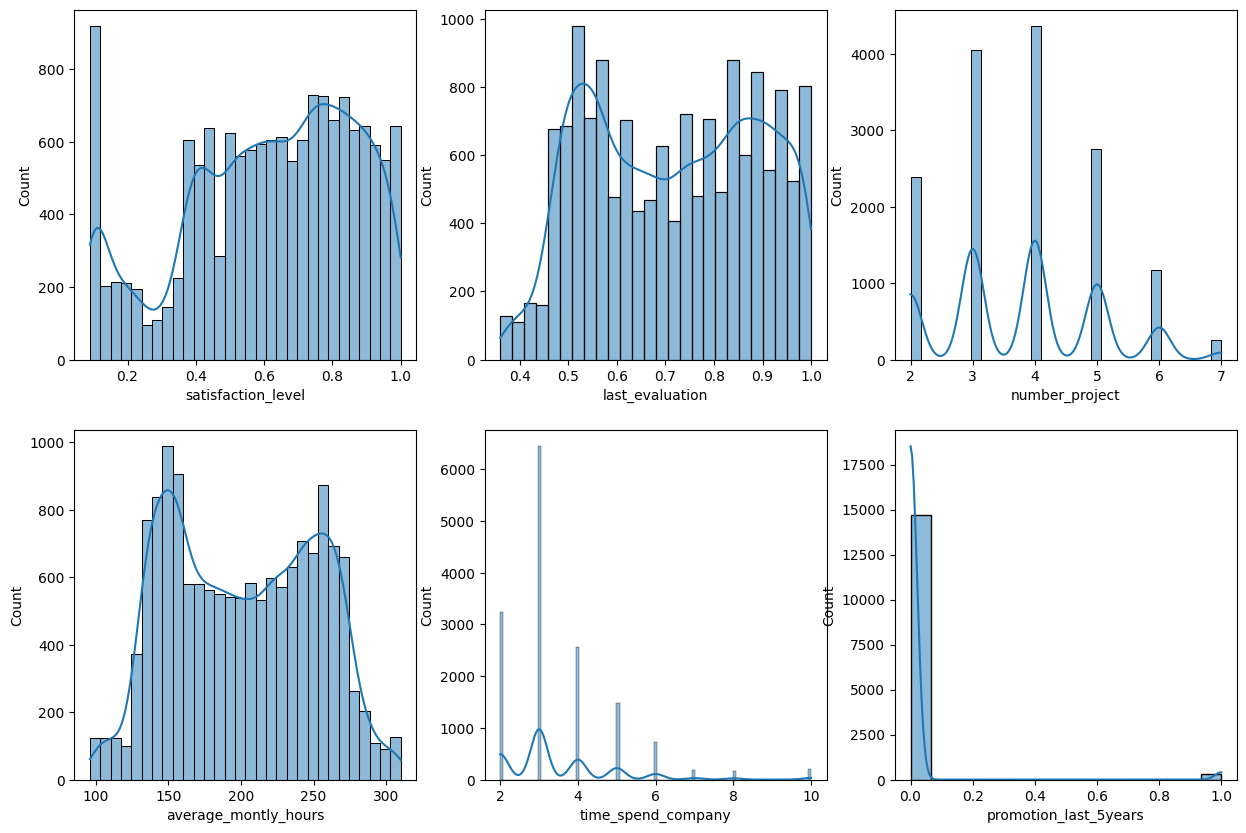

In [118]:
fig,ax = plt.subplots(2,3, figsize=(15,10))
sns.histplot(dataset['satisfaction_level'], ax = ax[0,0], kde=True) 
sns.histplot(dataset['last_evaluation'], ax = ax[0,1], kde=True) 
sns.histplot(dataset['number_project'], ax = ax[0,2], kde=True) 
sns.histplot(dataset['average_montly_hours'], ax = ax[1,0], kde=True) 
sns.histplot(dataset['time_spend_company'], ax = ax[1,1], kde=True) 
sns.histplot(dataset['promotion_last_5years'], ax = ax[1,2], kde=True)
plt.show()

##### Analysis from the above graph plot
1. Satisfaction decline: The satisfaction level graph shows a significant number of employees with low satisfaction while the last evaluation scores are generally higher.
2. Inconsistant work houes:
There's a wide spread of working hours, with peaks around 150 and 250 hours. This indicates that some employees are working significantly more than others, potentially leading to burnout for overworked staff and reduced productivity for underutilized employees.
3. Workload Imbalance: 
The combination of the number of projects and average monthly hours graphs points about uneven workload distribution. Some employees are likely taking on more projects and working longer hours to compensate for less active team members.
4. Lack of Promotions:
The promotion graph shows that promotions are extremely rare. This lack of career advancement opportunities could be a major factor in the declining satisfaction and inconsistent productivity.

5. Potential consequences:
<ul>

1. Lower team cooperation and contribution, are likely outcomes of these issues.
2. The bimodal distribution in satisfaction levels could indicate a forming divide in the workforce between engaged and disengaged employees. 
3. The time spent at company graph shows a sharp decline after 5 years, which could be related to the lack of promotions and satisfaction issues<
</ul>

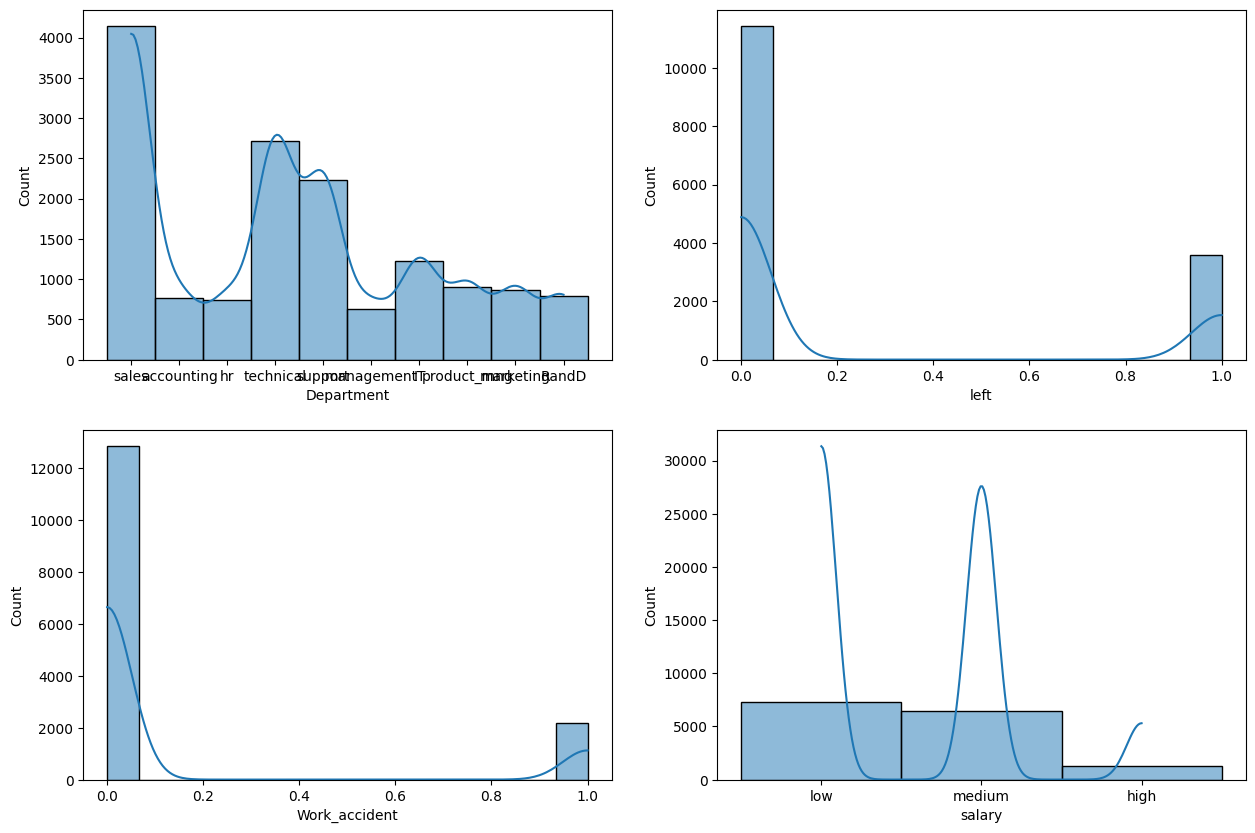

In [119]:
fig,ax = plt.subplots(2,2, figsize=(15,10))
sns.histplot(dataset["Department"], ax = ax[0,0], kde=True) 
sns.histplot(dataset['left'], ax = ax[0,1], kde=True) 
sns.histplot(dataset['Work_accident'], ax = ax[1,0], kde=True) 
sns.histplot(dataset['salary'], ax = ax[1,1], kde=True) 
plt.show()

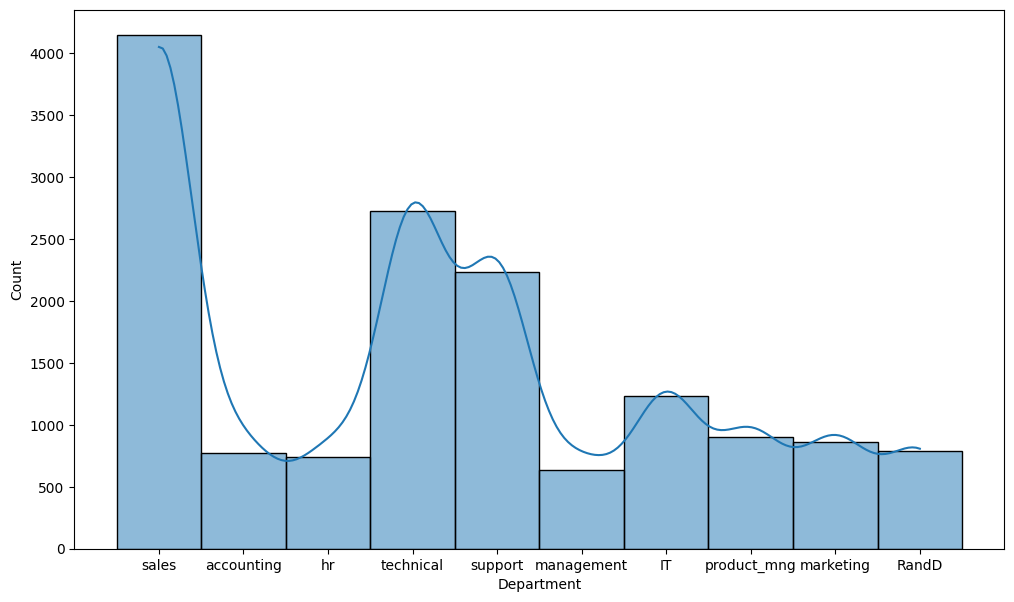

In [120]:
fig = plt.figure(figsize=[12,7])
sns.histplot(dataset["Department"], kde=True) 
plt.show()

1. Department distribution: The Sales department has the highest number of employees, followed by Technical, Support.and IT. This distribution can help the company understand where most of their workforce is concentrated, potentially impacting turnover rates in these departments. 
2. Retention vs. Turnover: The majority of employees have been retained, while a smaller proportion has left the company.
3. Low Incidents of Work Accidents: Most employees have not had any work accidents, suggesting a safe working environment.
4. Low Salary: A significant portion of the workforce is earning a low salary, followed by a considerable number on medium salaries, with only a small fraction earning a high salary. The concentration of employees in the low salary bracket could be a potential risk for turnover, especially if employees feel underpaid. 

#### Bivariate Analysis

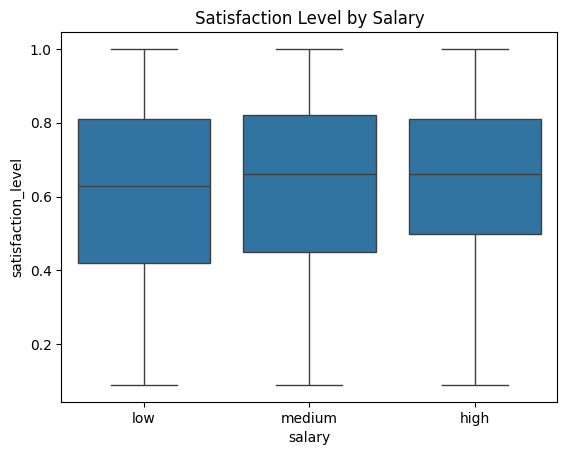

In [121]:
sns.boxplot(x='salary', y='satisfaction_level', data=dataset)
plt.title('Satisfaction Level by Salary')
plt.show()

Although there is a slight positive relationship between salary and satisfaction, the effect is not strong. Higher salaries are associated with somewhat higher and more consistent satisfaction levels, but there's considerable overlap in satisfaction across all salary levels. The satisfaction level does not impact a dramatic change in the salary.

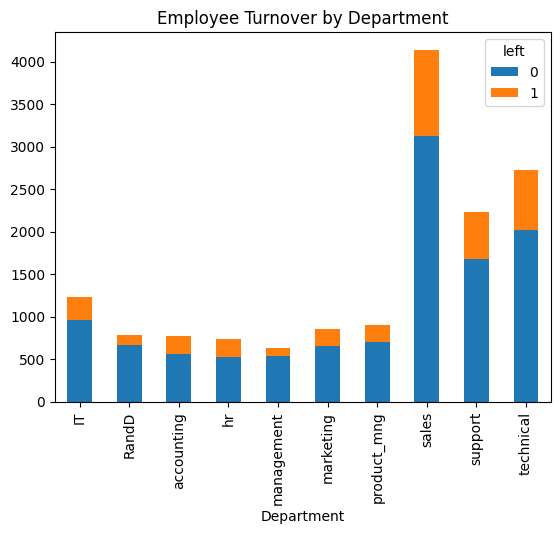

In [122]:
pd.crosstab(dataset['Department'], dataset['left']).plot(kind='bar', stacked=True)
plt.title('Employee Turnover by Department')
plt.show()

The plot shows that in the departments having greater count of employees have recorded more higher number of turnovers. 

In [123]:
corr = dataset.groupby(["left", "Work_accident"]).size().unstack(fill_value=0)
corr

Work_accident,0,1
left,,
0,9428,2000
1,3402,169


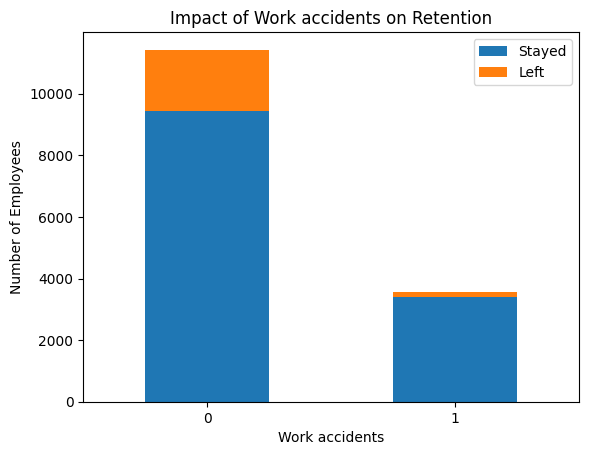

In [124]:
corr.plot(kind='bar', stacked=True)
plt.xlabel('Work accidents')
plt.ylabel('Number of Employees')
plt.title('Impact of Work accidents on Retention')
plt.xticks(rotation=0) 
plt.legend(['Stayed', 'Left'], loc='upper right')

The graph indicates that there is not much impact of work accident on the employees to leave. So we will exclude this column from our analysis. 

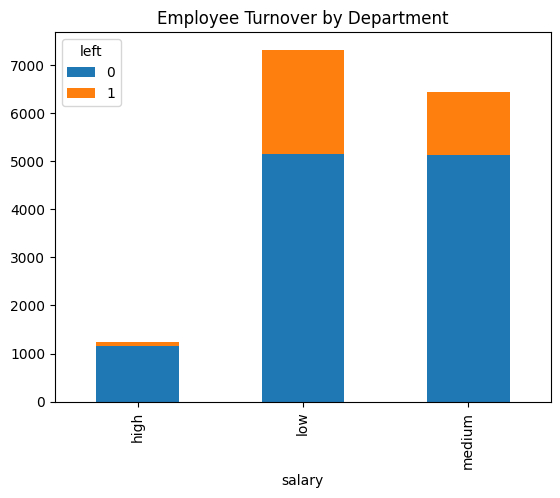

In [125]:
pd.crosstab(dataset['salary'], dataset['left']).plot(kind='bar', stacked=True)
plt.title('Employee Turnover by Department')
plt.show()

A very small portion of employees having high salary have left the company, while there is a significant concentration of people that left the company from low salary bracket. As mentioned above the reason may be that the employees may feel underpaid. Similar is the case with people working with medium salary range.

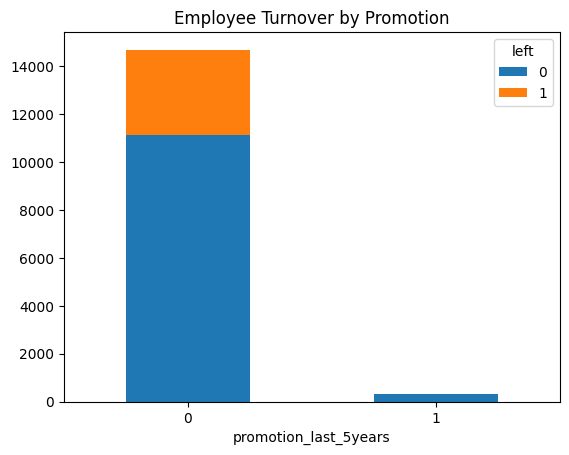

In [126]:
pd.crosstab(dataset['promotion_last_5years'], dataset['left']).plot(kind='bar', stacked=True)
plt.title('Employee Turnover by Promotion')
plt.xticks(rotation=0)
plt.show()

The plot shows that there are greater chance of employees leaving the company if there are no promotions. So basically,<br>

<strong>Employees leaving is inversely &prop; Promotions</strong>

In [127]:
print("Percentage of employees retained with no promotions",(dataset.query("promotion_last_5years==0 & left == 0").shape[0]/dataset.shape[0])*100)
print("Percentage of employees leaving with no promotions",(dataset.query("promotion_last_5years==0 & left == 1").shape[0]/dataset.shape[0])*100)
print("Percentage of employees retained with promotions",(dataset.query("promotion_last_5years==1 & left == 0").shape[0]/dataset.shape[0])*100)
print("Percentage of employees leaving with promotions",(dataset.query("promotion_last_5years==1 & left == 1").shape[0]/dataset.shape[0])*100)

Percentage of employees retained with no promotions 74.19161277418495
Percentage of employees leaving with no promotions 23.681578771918126
Percentage of employees retained with promotions 2.000133342222815
Percentage of employees leaving with promotions 0.1266751116741116


In [128]:
retained_cols = dataset.drop(columns=["Department", "salary"], axis=1)
retained_cols.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [129]:
retained_cols.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


The above code snippet clarifies that employees having low satisfaction level (satisfaction level below 50%) left the company. 

#### Analyzing change in satisfaction level compared to the last evaluation

In [130]:
satisfaction_change = dataset["satisfaction_level"]-dataset["last_evaluation"]
print("Minimum degradation of satisfaction level",(satisfaction_change.min())*100)
print("Maximum improvement of satisfaction level", (satisfaction_change.max())*100)

Minimum degradation of satisfaction level -89.0
Maximum improvement of satisfaction level 62.0


In [131]:
dataset["satisfaction_change"] = satisfaction_change
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,satisfaction_change
0,0.38,0.53,2,157,3,0,1,0,sales,low,-0.15
1,0.80,0.86,5,262,6,0,1,0,sales,medium,-0.06
2,0.11,0.88,7,272,4,0,1,0,sales,medium,-0.77
3,0.72,0.87,5,223,5,0,1,0,sales,low,-0.15
4,0.37,0.52,2,159,3,0,1,0,sales,low,-0.15


In [132]:
print("Count of employees showing positive improvement",dataset.query(f"satisfaction_change>0").shape[0])
print("Count of employees showing no improvement",dataset.query(f"satisfaction_change==0").shape[0])
print("Count of employees showing negative improvement",dataset.query(f"satisfaction_change<0").shape[0])

Count of employees showing positive improvement 5165
Count of employees showing no improvement 236
Count of employees showing negative improvement 9598


Out of 14999 records, 5165 employees show a positive improvement in the satisfaction level, 236 employes showed no changes, while 9598 employees show a negative shift in their satisfaction level.

### Data Transformation

In [133]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  satisfaction_change    14999 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 1.3+ MB


In [137]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'satisfaction_change', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_low',
       'salary_medium'],
      dtype='object')

In [135]:
print(dataset["Department"].unique())
print(dataset["salary"].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [136]:
dataset = pd.get_dummies(dataset, columns=['Department', 'salary'], dtype="int64", drop_first = True)
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_change,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,-0.15,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,-0.06,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,-0.77,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,-0.15,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,-0.15,0,0,0,0,0,0,1,0,0,1,0


In [138]:
dataset = dataset.drop(columns=["satisfaction_level", "last_evaluation", "Work_accident"])
print(dataset.shape)
dataset.head()

(14999, 17)


,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,satisfaction_change,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,2,157,3,1,0,-0.15,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,1,0,-0.06,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,1,0,-0.77,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,1,0,-0.15,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,1,0,-0.15,0,0,0,0,0,0,1,0,0,1,0


In [151]:
corr_matrix = dataset.corr()
corr_matrix

,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,satisfaction_change,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
number_project,1.000000,0.417211,0.196786,0.023787,-0.006064,-0.332588,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,-0.002504,0.007377
average_montly_hours,0.417211,1.000000,0.127755,0.071287,-0.003544,-0.220249,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,-0.001050,0.005007
time_spend_company,0.196786,0.127755,1.000000,0.144822,0.067433,-0.166056,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,-0.040110,0.018299
left,0.023787,0.071287,0.144822,1.000000,-0.061788,-0.340767,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,0.134722,-0.068833
promotion_last_5years,-0.006064,-0.003544,0.067433,-0.061788,1.000000,0.027393,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,-0.082832,0.040985
satisfaction_change,-0.332588,-0.220249,-0.166056,-0.340767,0.027393,1.000000,0.009004,-0.026157,-0.005378,0.000451,0.005142,0.007188,0.017227,-0.002246,-0.016310,-0.044241,0.023509
Department_RandD,0.009703,-0.001177,-0.021116,-0.046596,0.021268,0.009004,1.000000,-0.054629,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.011887,0.020402
Department_accounting,0.004189,0.000524,0.003909,0.015201,-0.004852,-0.026157,-0.054629,1.000000,-0.052848,-0.048610,-0.057183,-0.058723,-0.143341,-0.096989,-0.109262,-0.009759,0.003285
Department_hr,-0.027356,-0.010783,-0.022194,0.028249,-0.001531,-0.005378,-0.053570,-0.052848,1.000000,-0.047667,-0.056075,-0.057584,-0.140562,-0.095109,-0.107143,-0.015690,0.025765
Department_management,0.009728,0.000834,0.115436,-0.046035,0.128087,0.000451,-0.049274,-0.048610,-0.047667,1.000000,-0.051578,-0.052966,-0.129289,-0.087482,-0.098551,-0.084641,-0.030716


### Feature Engineering
Splitting the dependent and independent variable and Standardizing the variables

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ind_var = dataset.drop(columns=["left"])
dep_var = dataset["left"]

In [143]:
ind_var.head()

,number_project,average_montly_hours,time_spend_company,promotion_last_5years,satisfaction_change,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,2,157,3,0,-0.15,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,-0.06,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,-0.77,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,-0.15,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,-0.15,0,0,0,0,0,0,1,0,0,1,0


In [144]:
scaler = StandardScaler()
columns_to_scale = ["number_project", "average_montly_hours", "time_spend_company"]
ind_var[columns_to_scale] = scaler.fit_transform(ind_var[columns_to_scale])
ind_var.head()

,number_project,average_montly_hours,time_spend_company,promotion_last_5years,satisfaction_change,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,-1.462863,-0.882040,-0.341235,0,-0.15,0,0,0,0,0,0,1,0,0,1,0
1,0.971113,1.220423,1.713436,0,-0.06,0,0,0,0,0,0,1,0,0,0,1
2,2.593763,1.420657,0.343655,0,-0.77,0,0,0,0,0,0,1,0,0,0,1
3,0.971113,0.439508,1.028546,0,-0.15,0,0,0,0,0,0,1,0,0,1,0
4,-1.462863,-0.841993,-0.341235,0,-0.15,0,0,0,0,0,0,1,0,0,1,0


### Model development
Split the training and testing data and training the machine learning models on the data.

In [146]:
X_train, X_test, y_train, y_test = train_test_split(ind_var, dep_var, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11999, 16), (3000, 16), (11999,), (3000,))

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [148]:
y_pred_log_reg = lr_model.predict(X_test)
print("Logistic Regression Performance:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Performance:
[[2126  168]
 [ 556  150]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      2294
           1       0.47      0.21      0.29       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.57      3000
weighted avg       0.72      0.76      0.72      3000



In [149]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
[[2273   21]
 [  31  675]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.97      0.96      0.96       706

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [155]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()

NB_model.fit(X_train, y_train)

y_pred_NB = NB_model.predict(X_test)

# Evaluation
print("Naive Bayes classifier (Gaussian NB) Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Naive Bayes classifier (Gaussian NB) Performance:
[[2273   21]
 [  31  675]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.97      0.96      0.96       706

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [156]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)

# Evaluation
print("SVM Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

SVM Performance:
[[2273   21]
 [  31  675]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.97      0.96      0.96       706

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [157]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Classifier Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Decision Tree Classifier Performance:
[[2273   21]
 [  31  675]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.97      0.96      0.96       706

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000



**Summary of Model Performance:**

Five machine learning models were evaluated for predicting employee turnover: Logistic Regression, Random Forest, Naive Bayes (GaussianNB), SVM, and Decision Tree.

**Key Findings:**
- **Logistic Regression** performed the worst, showing lower precision, recall, and F1-score.
- **Random Forest, Naive Bayes, SVM, and Decision Tree** all achieved high accuracy and similar performance metrics.
- **GaussianNB** was the fastest in training and prediction, followed by **Decision Tree**.
- **Random Forest** and **SVM** were slightly slower but still delivered strong performance.

**Conclusion:**
While Logistic Regression underperformed, the other models excelled. **GaussianNB** and **Decision Tree** are recommended for their speed, while **Random Forest** offers robustness at a higher computational cost.